In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as rmse
from sklearn.metrics import mean_absolute_percentage_error as mape
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [2]:
df_train = pd.read_csv('train_df.csv')
df_test = pd.read_csv('test_df.csv')


In [3]:
model = SARIMAX(endog=df_train['value'][-200:],    
                order=(1, 1, 1),          # ARIMA: p=1, d=1, q=1
                seasonal_order=(1, 1, 1, 7),  # sezonowość tygodniowa
                enforce_stationarity=False,
                enforce_invertibility=False
                )



In [ ]:
# model = SARIMAX(df_train['value'],
#                 order=(1, 0, 1),             # niesezonowa część
#                 seasonal_order=(2, 3, 1, 7*12) # sezonowa część: raz w roku (co 12 miesięcy)
#                )
model = SARIMAX(endog=df_train['value'][-200:],    
                order=(1, 1, 1),          # ARIMA: p=1, d=1, q=1
                seasonal_order=(1, 1, 1, 7),  # sezonowość tygodniowa
                enforce_stationarity=False,
                enforce_invertibility=False
                )

c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE: 5.76
MAE: 102951.02
RMSE: 13781243703.00


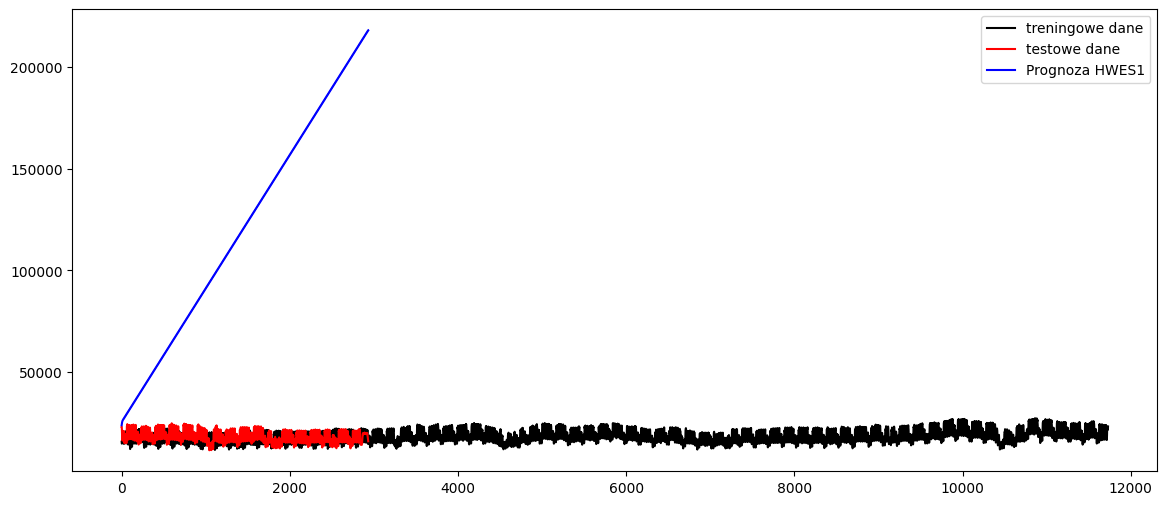

In [ ]:
# Dopasuj model i prognozuj
model.fit(df_train['value'][-200:])
forecast = model.fit().forecast(steps=len(df_test))

df_test["forecast"] = forecast.values
mape_value = mape(df_test["value"], df_test["forecast"])
mae_value = mae(df_test["value"], df_test["forecast"])
rmse_value = rmse(df_test["value"], df_test["forecast"])


plt.figure(figsize=(14, 6))
plt.plot(df_train["value"], label='treningowe dane', color='black')
plt.plot(df_test["value"], label='testowe dane', color='red')
plt.plot(df_test["forecast"], label='Prognoza HWES1', color='blue')

plt.legend()

print(f"MAPE: {mape_value:.2f}")
print(f"MAE: {mae_value:.2f}")
print(f"RMSE: {rmse_value:.2f}")